# Visualization of High-Dimensional Data -- Fashion-MNIST

We only can visualize in three dimensions or less. We will explore a few algorithms that will help us visualize high dimensional data in this notebook. We will use the Fashion-MNIST dataset which contains 70000 everyday clothing items/accesories represented as a vector in 784-D space. Please read the description below for further information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version: ',sns.__version__)

numpy version:  1.16.5
pandas version:  0.25.1
seaborn version:  0.9.0


### Initial Exploration of the Dataset

In [2]:
#loading the dataset from a public repository.

from sklearn.datasets import fetch_openml

fmnist = fetch_openml('fashion-MNIST')
print(fmnist.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [3]:
#for some reason, categories is empty

fmnist.categories

{}

In [4]:
#so we make our own categories

categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# sanity check: ensuring the data has the expected number of rows and features

X = fmnist['data']
y = fmnist['target'].astype(np.uint8)
X.shape, y.shape

((70000, 784), (70000,))

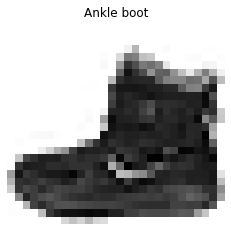

In [6]:
#sanity check: the first item in the dataset

plt.imshow(X[0].reshape((28, 28)), cmap='binary')
plt.title(categories[y[0]])
plt.axis('off')
plt.show()

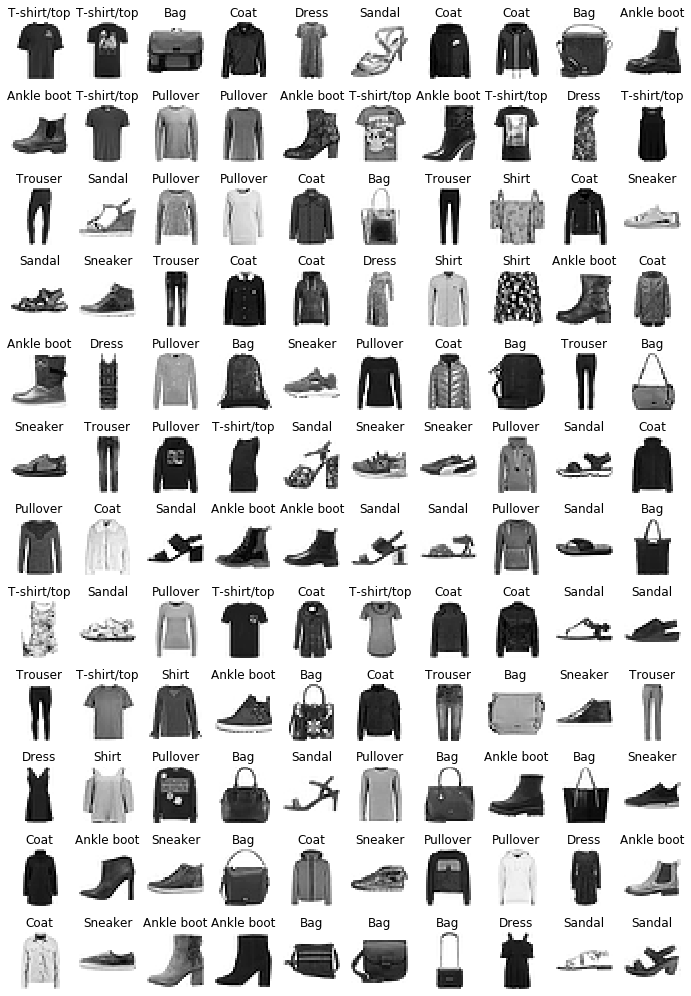

In [7]:
#random sample of 120

np.random.seed(seed=2019)
mask = np.random.randint(low=0, high=70000, size=120)

plt.figure(figsize=(12,18))

for k in range(0, 120):
    plt.subplot(12, 10, 1 + k)
    plt.imshow(X[mask[k]].reshape((28, 28)), cmap='binary')
    plt.title(categories[y[mask[k]]])
    plt.axis('off')

plt.show()

### Principal Component Analysis (PCA)
The idea is that we will take the first two principal components and then do a scatter plot.

In [8]:
#we will first scale the data and do a PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)
X_pca2 = PCA(n_components=2).fit_transform(X_scaled)

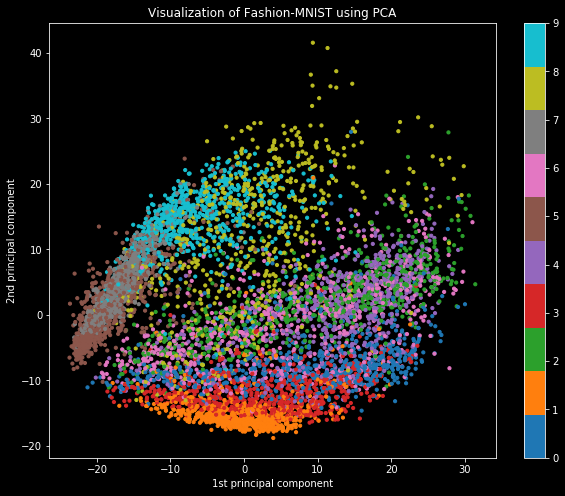

In [9]:
#we will now scatter plot only 10% of the data so as to avoid cluttering

from sklearn.model_selection import train_test_split
X_discard, X_ten, y_discard, y_ten = train_test_split(X_pca2, y, random_state=2019, 
                                                      test_size=0.1, stratify=y)
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.scatter(X_ten[:, 0], X_ten[:, 1], c=y_ten, cmap='tab10', s=10)
plt.colorbar()
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Visualization of Fashion-MNIST using PCA')
plt.show()

#### Conclusion:
PCA with only 2 components does not do a good job of separating all classes (which should not be surprising, since we are reducing the dimension from 784 to 2 in a crude manner). It did a good job of separation several categories from each other such as: separating trousers from ankle boots and dresses from sandals, etc. However, there is no clear demarcation between coats and shirt nor between bags and ankle boots.

### Non-negative Matrix Factorization (NMF)
Since the features are all non-negative, we might as well try NMF.

In [10]:
from sklearn.decomposition import NMF

X_s = X/255
X_nmf = NMF(n_components=2, random_state=2019).fit_transform(X_s)

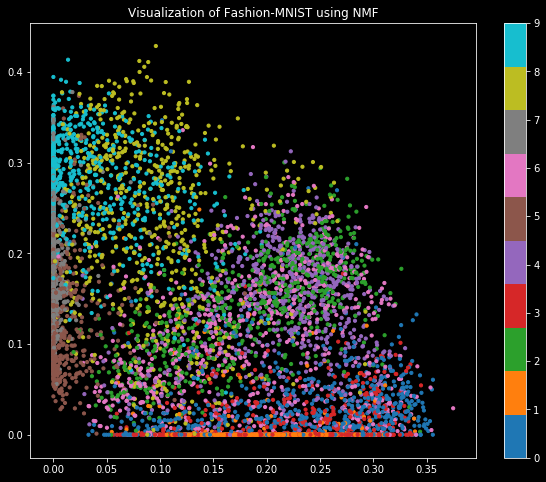

In [11]:
#we will now scatter plot only 10% of the data so as to avoid cluttering

X_discard, X_nmf10, y_discard, y_nmf10 = train_test_split(X_nmf, y, random_state=2019, 
                                                      test_size=0.1, stratify=y)

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.scatter(X_nmf10[:, 0], X_nmf10[:, 1], c=y_nmf10, cmap='tab10', s=10)
plt.colorbar()
plt.title('Visualization of Fashion-MNIST using NMF')
plt.show()

#### Conclusion:
The result seem to be worse than PCA interms of separation and fuzziness.

### t-distributed Stochastic Neighbor Embedding (t-SNE)
We will restrict ourselves to only 10% of the data for computational reasons and first apply PCA with 50 components to reduce dimesion as recommended by sklearn API guide.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

X_discard, X_10, y_discard, y_10 = train_test_split(X, y, random_state=2019, 
                                                      test_size=0.1, stratify=y)

tsne = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('tsne', TSNE(n_components=2, random_state=2019, verbose=1))
])

X_tsne = tsne.fit_transform(X_10)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.035s...
[t-SNE] Computed neighbors for 7000 samples in 6.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 4.341639
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.071251
[t-SNE] KL divergence after 1000 iterations: 1.353387


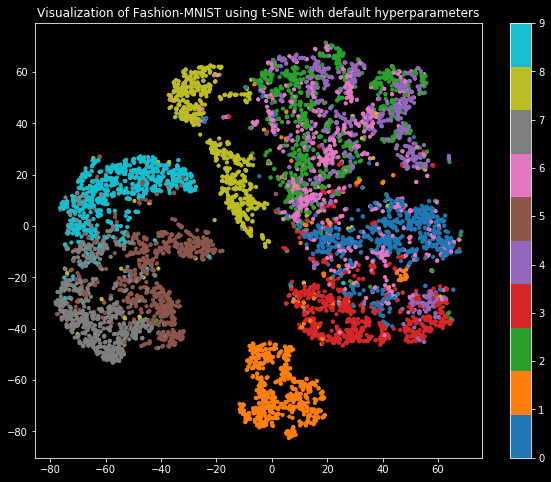

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_10, cmap='tab10', s=10)
plt.colorbar()
plt.title('Visualization of Fashion-MNIST using t-SNE with default hyperparameters')
plt.show()

#### Conclusion:
As one can see, t-SNE did a much better job than PCA with 2 components for separating the items. Trousers and bag are clearly separated from the rest, although fuzziness between pullovers, shirts, and coats persists.

### Uniform Manifold Approximation and Projection (UMAP)

In [14]:
#getting some silly warnings about parallel processing
import warnings
warnings.filterwarnings('ignore')

from umap import UMAP
X_umap = UMAP().fit_transform(X_10)

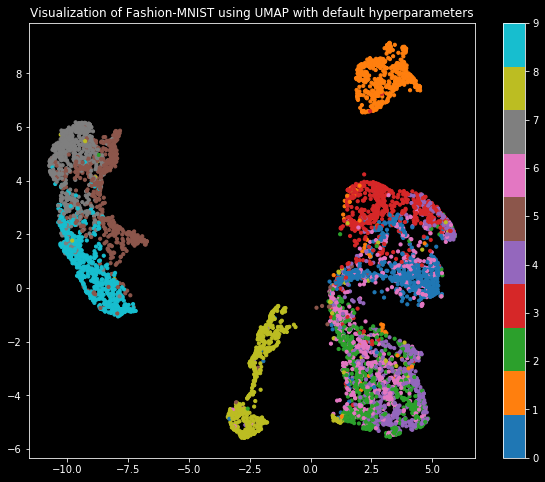

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_10, cmap='tab10', s=10)
plt.colorbar()
plt.title('Visualization of Fashion-MNIST using UMAP with default hyperparameters')
plt.show()

In [16]:
#let's play with the hyperparameters

X_umap = UMAP(n_neighbors=10, min_dist=0.1).fit_transform(X_10)

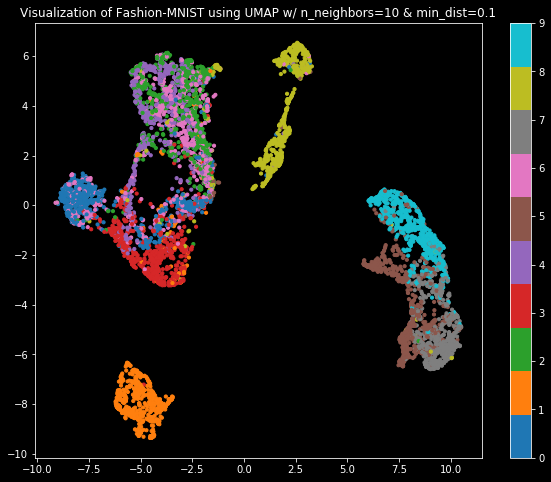

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_10, cmap='tab10', s=10)
plt.colorbar()
plt.title('Visualization of Fashion-MNIST using UMAP w/ n_neighbors=10 & min_dist=0.1')
plt.show()

#### Conclusion:
UMAP did a similarly good job as t-SNE, but it took considerably less time.

### Isomap Embedding

In [18]:
from sklearn.manifold import Isomap

X_iso = Isomap(n_components=2).fit_transform(X_10)

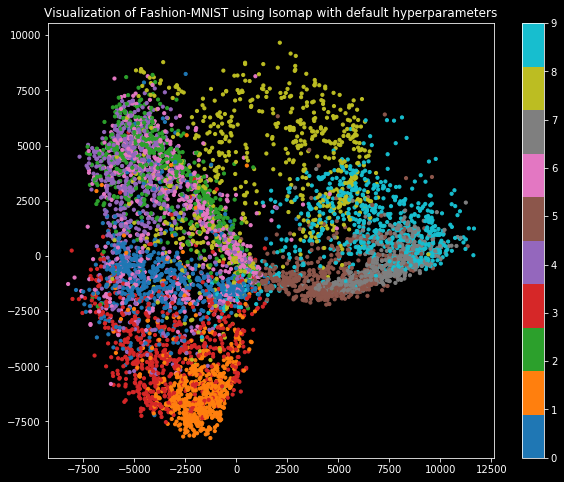

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_10, cmap='tab10', s=10)
plt.colorbar()
plt.title('Visualization of Fashion-MNIST using Isomap with default hyperparameters')
plt.show()

#### Conclusion:
Slight improvement over PCA in terms of separation and fuzziness; however, nowhere close to UMAP ot t-SNE.